In [75]:
import pandas as pd 
import numpy as np

In [100]:

bt2023 = pd.read_csv(r"C:\Users\rahul\Desktop\1 minute Results\backtest2023-adaptiveSL-1min.csv") 
bt2024 = pd.read_csv(r"C:\Users\rahul\Desktop\1 minute Results\backtest2024-adaptiveSL-1min.csv")
bt2022 = pd.read_csv(r"C:\Users\rahul\Desktop\1 minute Results\backtest2022-adaptiveSL-1min(New).csv")
bt2021 = pd.read_csv(r"C:\Users\rahul\Desktop\1 minute Results\backtest2021-adaptiveSL-1min.csv")
bt2020 = pd.read_csv(r"C:\Users\rahul\Desktop\1 minute Results\backtest2020-adaptiveSL-1min.csv")
bt2019 = pd.read_csv(r"C:\Users\rahul\Desktop\1 minute Results\backtest2019-adaptiveSL-1min.csv")

In [101]:
btall = [bt2019, bt2020, bt2021, bt2022, bt2023, bt2024]
df = pd.concat(btall, ignore_index=True)
df

,Unnamed: 0,Ticker,Datetime,Open,High,Low,Close,ama,rsi,atr,...,legPriceFinal3,legPriceFinal4,m2m1,m2m2,m2m3,m2m4,totalPL,cumReturns,balance,stoploss
0,0,NIFTY,2019-01-01 09:15:00+05:30,10881.70,10881.70,10881.70,10881.70,10871.122710,51.426764,3.117619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,NaN
1,1,NIFTY,2019-01-01 09:16:00+05:30,10884.10,10885.30,10872.30,10874.55,10871.125790,50.424837,3.165476,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,NaN
2,2,NIFTY,2019-01-01 09:17:00+05:30,10874.10,10879.15,10874.10,10874.90,10871.129000,50.472298,3.173571,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,NaN
3,3,NIFTY,2019-01-01 09:18:00+05:30,10873.85,10876.65,10873.85,10876.65,10871.132410,50.709366,3.173095,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,NaN
4,4,NIFTY,2019-01-01 09:19:00+05:30,10876.70,10876.70,10861.65,10863.65,10871.135430,48.960140,3.229286,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497884,34864,NaN,2024-05-17 15:25:00+05:30,22472.15,22473.15,22468.60,22469.95,22384.555014,59.023836,26.021429,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
497885,34865,NaN,2024-05-17 15:26:00+05:30,22468.80,22470.65,22464.40,22469.95,22384.555014,59.023836,26.021429,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
497886,34866,NaN,2024-05-17 15:27:00+05:30,22469.90,22482.40,22469.90,22472.75,22384.555014,59.023836,26.021429,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
497887,34867,NaN,2024-05-17 15:28:00+05:30,22472.90,22475.00,22461.20,22465.30,22384.555014,59.023836,26.021429,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [102]:
# df.drop(columns=['Unnamed: 0'], inplace=True)
df['day'] = pd.to_datetime(df['Datetime']).dt.day_name()
# df.drop(columns=['Unnamed: 0.1'], inplace=True)

In [103]:
# create a new column for date 
df['date'] = pd.to_datetime(df['Datetime']).dt.date

In [104]:
df['date']= pd.to_datetime(df['date'])


In [105]:
initial = 100000

In [106]:
# group by date and sum the totalPL
daily_returns = df.groupby('date')['totalPL'].sum().reset_index()

In [107]:
daily_returns.head(50)

,date,totalPL
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-07,0.0
5,2019-01-08,0.0
6,2019-01-09,0.0
7,2019-01-10,0.0
8,2019-01-11,0.0
9,2019-01-14,0.0


In [108]:
daily_returns['balance'] = initial + daily_returns['totalPL'].cumsum()

In [109]:
# drop rows where total pl is 0
# daily_returns = daily_returns[daily_returns['totalPL'] != 0]
daily_returns['totalPLcumsum'] = daily_returns['totalPL'].cumsum()

In [110]:
#create pct_change column
daily_returns['pct_change'] = daily_returns['balance'].pct_change()


In [111]:
daily_returns

,date,totalPL,balance,totalPLcumsum,pct_change
0,2019-01-01,0.0,100000.0,0.0,NaN
1,2019-01-02,0.0,100000.0,0.0,0.0
2,2019-01-03,0.0,100000.0,0.0,0.0
3,2019-01-04,0.0,100000.0,0.0,0.0
4,2019-01-07,0.0,100000.0,0.0,0.0
...,...,...,...,...,...
1322,2024-05-13,0.0,662770.0,562770.0,0.0
1323,2024-05-14,0.0,662770.0,562770.0,0.0
1324,2024-05-15,0.0,662770.0,562770.0,0.0
1325,2024-05-16,0.0,662770.0,562770.0,0.0


In [91]:
daily_returns['date'] = daily_returns['date'].dt.to_pydatetime()

C:\Users\rahul\AppData\Local\Temp\ipykernel_24928\4180157508.py:1: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  daily_returns['date'] = daily_returns['date'].dt.to_pydatetime()


In [92]:
daily_returns['day'] = daily_returns['date'].dt.day_name()

In [93]:
# set index to date
daily_returns.set_index('date', inplace=True)

In [94]:
#save to csv
daily_returns.to_csv('D:/final backtests/final/daily_returns1minpyfolio.csv')

In [124]:
data15= pd.read_csv('D:/final backtests/final/daily_returnspyfolio.csv')
data15

,date,totalPL,balance,totalPLcumsum,pct_change,day
0,2019-01-01,0.0,100000.0,0.0,NaN,Tuesday
1,2019-01-02,0.0,100000.0,0.0,0.0,Wednesday
2,2019-01-03,0.0,100000.0,0.0,0.0,Thursday
3,2019-01-04,0.0,100000.0,0.0,0.0,Friday
4,2019-01-07,0.0,100000.0,0.0,0.0,Monday
...,...,...,...,...,...,...
1322,2024-05-13,0.0,932112.5,832112.5,0.0,Monday
1323,2024-05-14,0.0,932112.5,832112.5,0.0,Tuesday
1324,2024-05-15,0.0,932112.5,832112.5,0.0,Wednesday
1325,2024-05-16,0.0,932112.5,832112.5,0.0,Thursday


In [125]:
#set index to date
data15.set_index('date', inplace=True)


In [126]:
data15

,totalPL,balance,totalPLcumsum,pct_change,day
date,,,,,
2019-01-01,0.0,100000.0,0.0,NaN,Tuesday
2019-01-02,0.0,100000.0,0.0,0.0,Wednesday
2019-01-03,0.0,100000.0,0.0,0.0,Thursday
2019-01-04,0.0,100000.0,0.0,0.0,Friday
2019-01-07,0.0,100000.0,0.0,0.0,Monday
...,...,...,...,...,...
2024-05-13,0.0,932112.5,832112.5,0.0,Monday
2024-05-14,0.0,932112.5,832112.5,0.0,Tuesday
2024-05-15,0.0,932112.5,832112.5,0.0,Wednesday


In [134]:
daily_returns.set_index('date', inplace=True)

In [136]:
daily_returns

,totalPL,balance,totalPLcumsum,pct_change
date,,,,
2019-01-01,0.0,100000.0,0.0,NaN
2019-01-02,0.0,100000.0,0.0,0.0
2019-01-03,0.0,100000.0,0.0,0.0
2019-01-04,0.0,100000.0,0.0,0.0
2019-01-07,0.0,100000.0,0.0,0.0
...,...,...,...,...
2024-05-13,0.0,662770.0,562770.0,0.0
2024-05-14,0.0,662770.0,562770.0,0.0
2024-05-15,0.0,662770.0,562770.0,0.0


In [132]:
data15.head()

,totalPL,balance,totalPLcumsum,pct_change,day
date,,,,,
2019-01-01,0.0,100000.0,0.0,NaN,Tuesday
2019-01-02,0.0,100000.0,0.0,0.0,Wednesday
2019-01-03,0.0,100000.0,0.0,0.0,Thursday
2019-01-04,0.0,100000.0,0.0,0.0,Friday
2019-01-07,0.0,100000.0,0.0,0.0,Monday


In [140]:

# change data15 index to datetime
data15.index = pd.to_datetime(data15.index)


c:\Users\rahul\Documents\GitHub\Endovia\.venv\Lib\site-packages\pyfolio\plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.212%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2019-01-01
End date,2024-05-17
Total months,63
,Backtest
Annual return,43.212%
Cumulative returns,562.77%
Annual volatility,10.866%
Sharpe ratio,3.36
Calmar ratio,7.67
Stability,0.86
Max drawdown,-5.635%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.63,2019-06-04,2019-06-19,2019-07-05,24
1,5.01,2019-04-22,2019-05-02,2019-05-13,16
2,3.84,2019-08-21,2019-08-30,2019-09-05,12
3,3.74,2019-07-19,2019-07-25,2019-08-01,10
4,3.56,2020-10-27,2020-11-06,2020-11-20,19


c:\Users\rahul\Documents\GitHub\Endovia\.venv\Lib\site-packages\pyfolio\plotting.py:1373: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(
c:\Users\rahul\Documents\GitHub\Endovia\.venv\Lib\site-packages\pyfolio\plotting.py:1401: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])
c:\Users\rahul\Documents\GitHub\Endovia\.venv\Lib\site-packages\pyfolio\tears.py:1004: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn(


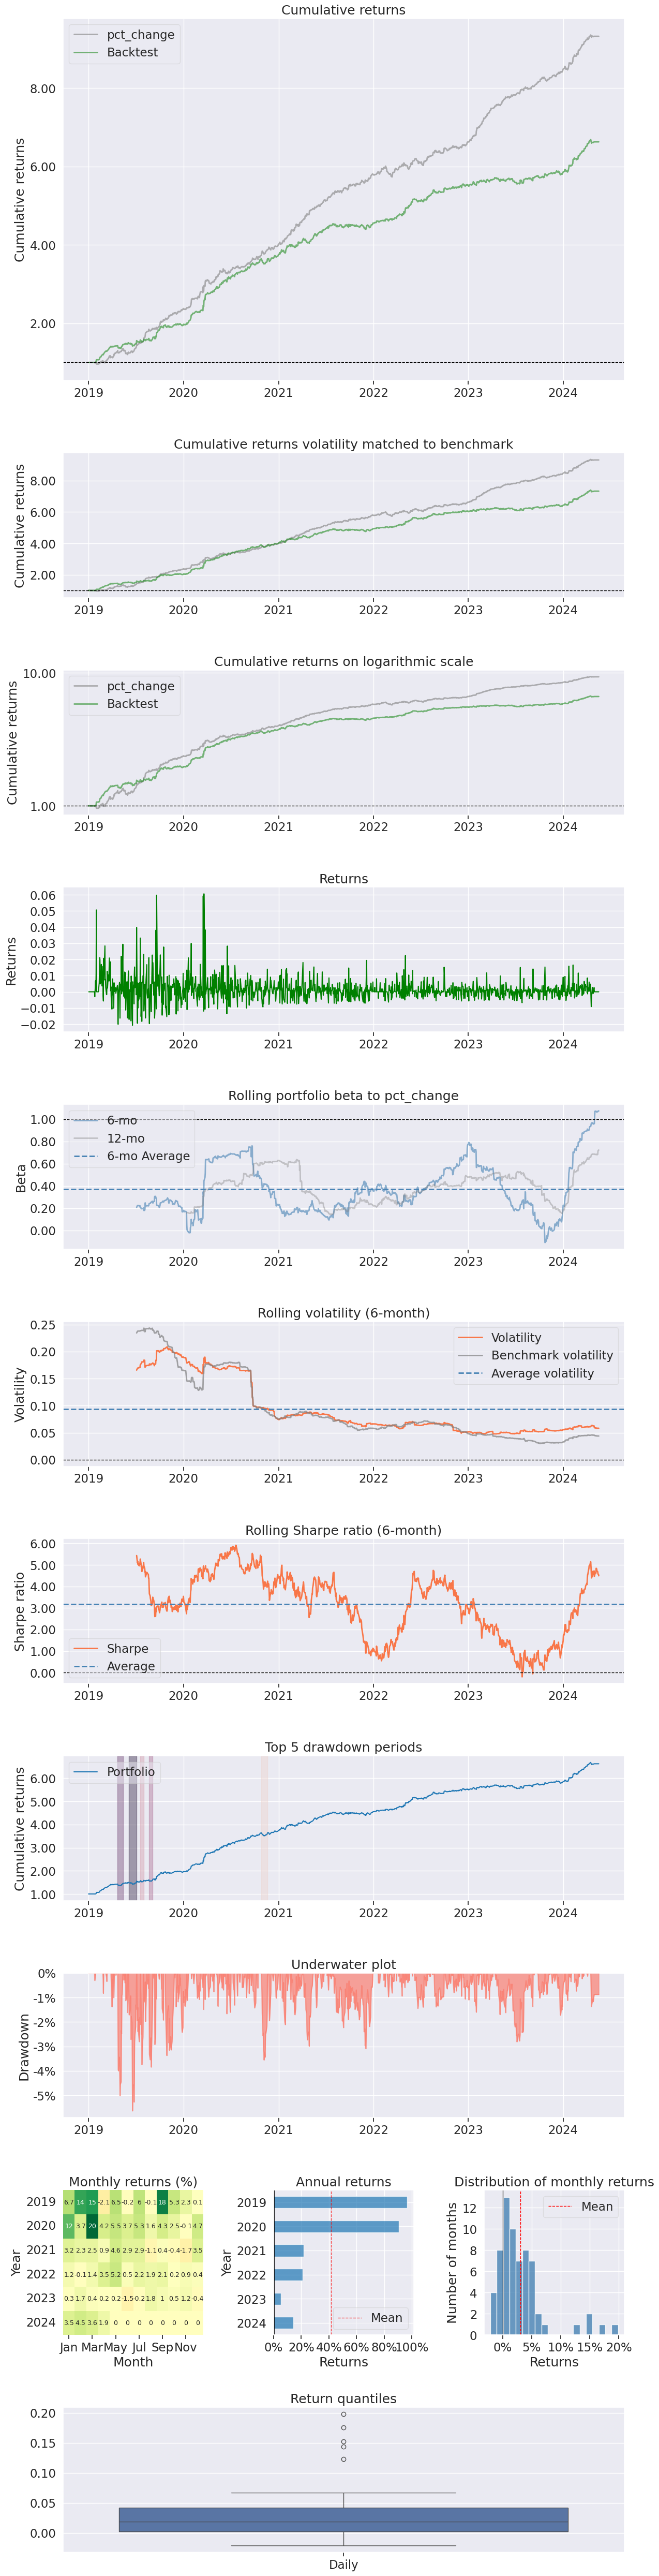

In [141]:
import pyfolio as pf
#create a pyfolio tear sheet with benchmark from data15 and returns from daily_returns




pf.create_full_tear_sheet(returns = daily_returns['pct_change'], benchmark_rets=data15['pct_change'],)


<Axes: title={'center': 'Underwater plot'}, ylabel='Drawdown'>

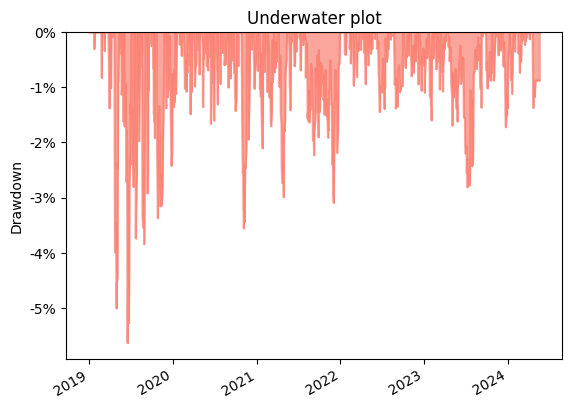

In [153]:
#plot drawdown underwater for both benchmark and returns
pf.plot_drawdown_underwater(returns = daily_returns['pct_change'])









In [40]:
daily_returns

,totalPL,balance,totalPLcumsum,pct_change,day
date,,,,,
2019-01-01,0.0,100000.0,0.0,NaN,Tuesday
2019-01-02,0.0,100000.0,0.0,0.0,Wednesday
2019-01-03,0.0,100000.0,0.0,0.0,Thursday
2019-01-04,0.0,100000.0,0.0,0.0,Friday
2019-01-07,0.0,100000.0,0.0,0.0,Monday
...,...,...,...,...,...
2024-05-13,0.0,586640.0,486640.0,0.0,Monday
2024-05-14,0.0,586640.0,486640.0,0.0,Tuesday
2024-05-15,0.0,586640.0,486640.0,0.0,Wednesday


In [112]:
import pandas as pd
import numpy as np
from itertools import groupby




# Convert date column to datetime
daily_returns['date'] = pd.to_datetime(daily_returns['date'])

# Total Trades
total_trades = len(daily_returns)

# Profitable Trades
profitable_trades = daily_returns[daily_returns['totalPL'] > 0]['totalPL'].count()

# Losing Trades
losing_trades = daily_returns[daily_returns['totalPL'] < 0]['totalPL'].count()

# Avg. Trades Per Month
avg_trades_per_month = daily_returns.resample('M', on='date')['totalPL'].count().mean()

# Helper function to calculate streaks with dates
def calculate_streaks(daily_returns, condition):
    streaks = []
    streak_start = None
    streak_length = 0

    for i, row in daily_returns.iterrows():
        if condition(row['totalPL']):
            if streak_length == 0:
                streak_start = row['date']
            streak_length += 1
        else:
            if streak_length > 0:
                streaks.append((streak_start, row['date'] - pd.Timedelta(days=1), streak_length))
            streak_length = 0

    if streak_length > 0:
        streaks.append((streak_start, row['date'], streak_length))

    return streaks

# Max Profitable Streak
profitable_streaks = calculate_streaks(daily_returns, lambda x: x > 0)
max_profitable_streak = max(profitable_streaks, key=lambda x: x[2], default=(None, None, 0))

# Max Losing Streak
losing_streaks = calculate_streaks(daily_returns, lambda x: x < 0)
max_losing_streak = max(losing_streaks, key=lambda x: x[2], default=(None, None, 0))

# Hit Ratio
hit_ratio = profitable_trades / total_trades if total_trades > 0 else 0

# Risk Reward
avg_profit_per_trade = daily_returns[daily_returns['totalPL'] > 0]['totalPL'].mean()
avg_loss_per_trade = daily_returns[daily_returns['totalPL'] < 0]['totalPL'].mean()

risk_reward_ratio = abs(avg_profit_per_trade / avg_loss_per_trade) if avg_loss_per_trade != 0 else float('inf')

# Print the metrics
print(f"Total Trades: {total_trades}")
print(f"Profitable Trades: {profitable_trades}")
print(f"Losing Trades: {losing_trades}")
print(f"Avg. Trades Per Month: {avg_trades_per_month}")
print(f"Hit Ratio: {hit_ratio}")
print(f"Risk Reward Ratio: {risk_reward_ratio}")

# Print streak details
print(f"Max Profitable Streak: {max_profitable_streak[2]} days (from {max_profitable_streak[0]} to {max_profitable_streak[1]})")
print(f"Max Losing Streak: {max_losing_streak[2]} days (from {max_losing_streak[0]} to {max_losing_streak[1]})")

# Print all streaks
print("\nProfitable Streaks:")
for start, end, length in profitable_streaks:
    print(f"Streak of {length} days from {start} to {end}")

print("\nLosing Streaks:")
for start, end, length in losing_streaks:
    print(f"Streak of {length} days from {start} to {end}")


C:\Users\rahul\AppData\Local\Temp\ipykernel_24928\4240040003.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_trades_per_month = daily_returns.resample('M', on='date')['totalPL'].count().mean()


Total Trades: 1327
Profitable Trades: 778
Losing Trades: 463
Avg. Trades Per Month: 20.415384615384614
Hit Ratio: 0.586284853051997
Risk Reward Ratio: 1.1346261330146106
Max Profitable Streak: 13 days (from 2021-05-04 00:00:00 to 2021-05-23 00:00:00)
Max Losing Streak: 6 days (from 2020-09-24 00:00:00 to 2020-10-04 00:00:00)

Profitable Streaks:
Streak of 4 days from 2019-01-28 00:00:00 to 2019-01-31 00:00:00
Streak of 11 days from 2019-02-11 00:00:00 to 2019-02-25 00:00:00
Streak of 6 days from 2019-02-28 00:00:00 to 2019-03-10 00:00:00
Streak of 11 days from 2019-03-13 00:00:00 to 2019-03-28 00:00:00
Streak of 2 days from 2019-04-02 00:00:00 to 2019-04-03 00:00:00
Streak of 1 days from 2019-04-05 00:00:00 to 2019-04-07 00:00:00
Streak of 5 days from 2019-04-09 00:00:00 to 2019-04-15 00:00:00
Streak of 2 days from 2019-04-18 00:00:00 to 2019-04-22 00:00:00
Streak of 1 days from 2019-04-30 00:00:00 to 2019-05-01 00:00:00
Streak of 3 days from 2019-05-03 00:00:00 to 2019-05-07 00:00:00


In [96]:
min1plot=pd.read_csv(r'D:/final backtests/final/daily_returns1minpyfolio.csv')
min15plot=pd.read_csv(r'D:/final backtests/final/daily_returnspyfolio.csv')

In [97]:
import matplotlib.pyplot as plt


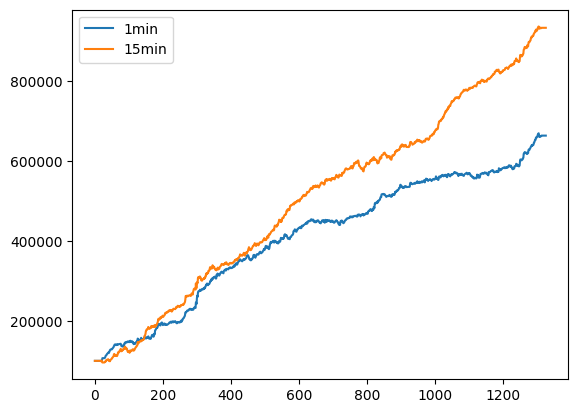

In [114]:
#plot balance comumn from both min1plot and min15plot
plt.plot(min1plot['balance'], label='1min')
plt.plot(min15plot['balance'], label='15min')
plt.legend()
plt.show()


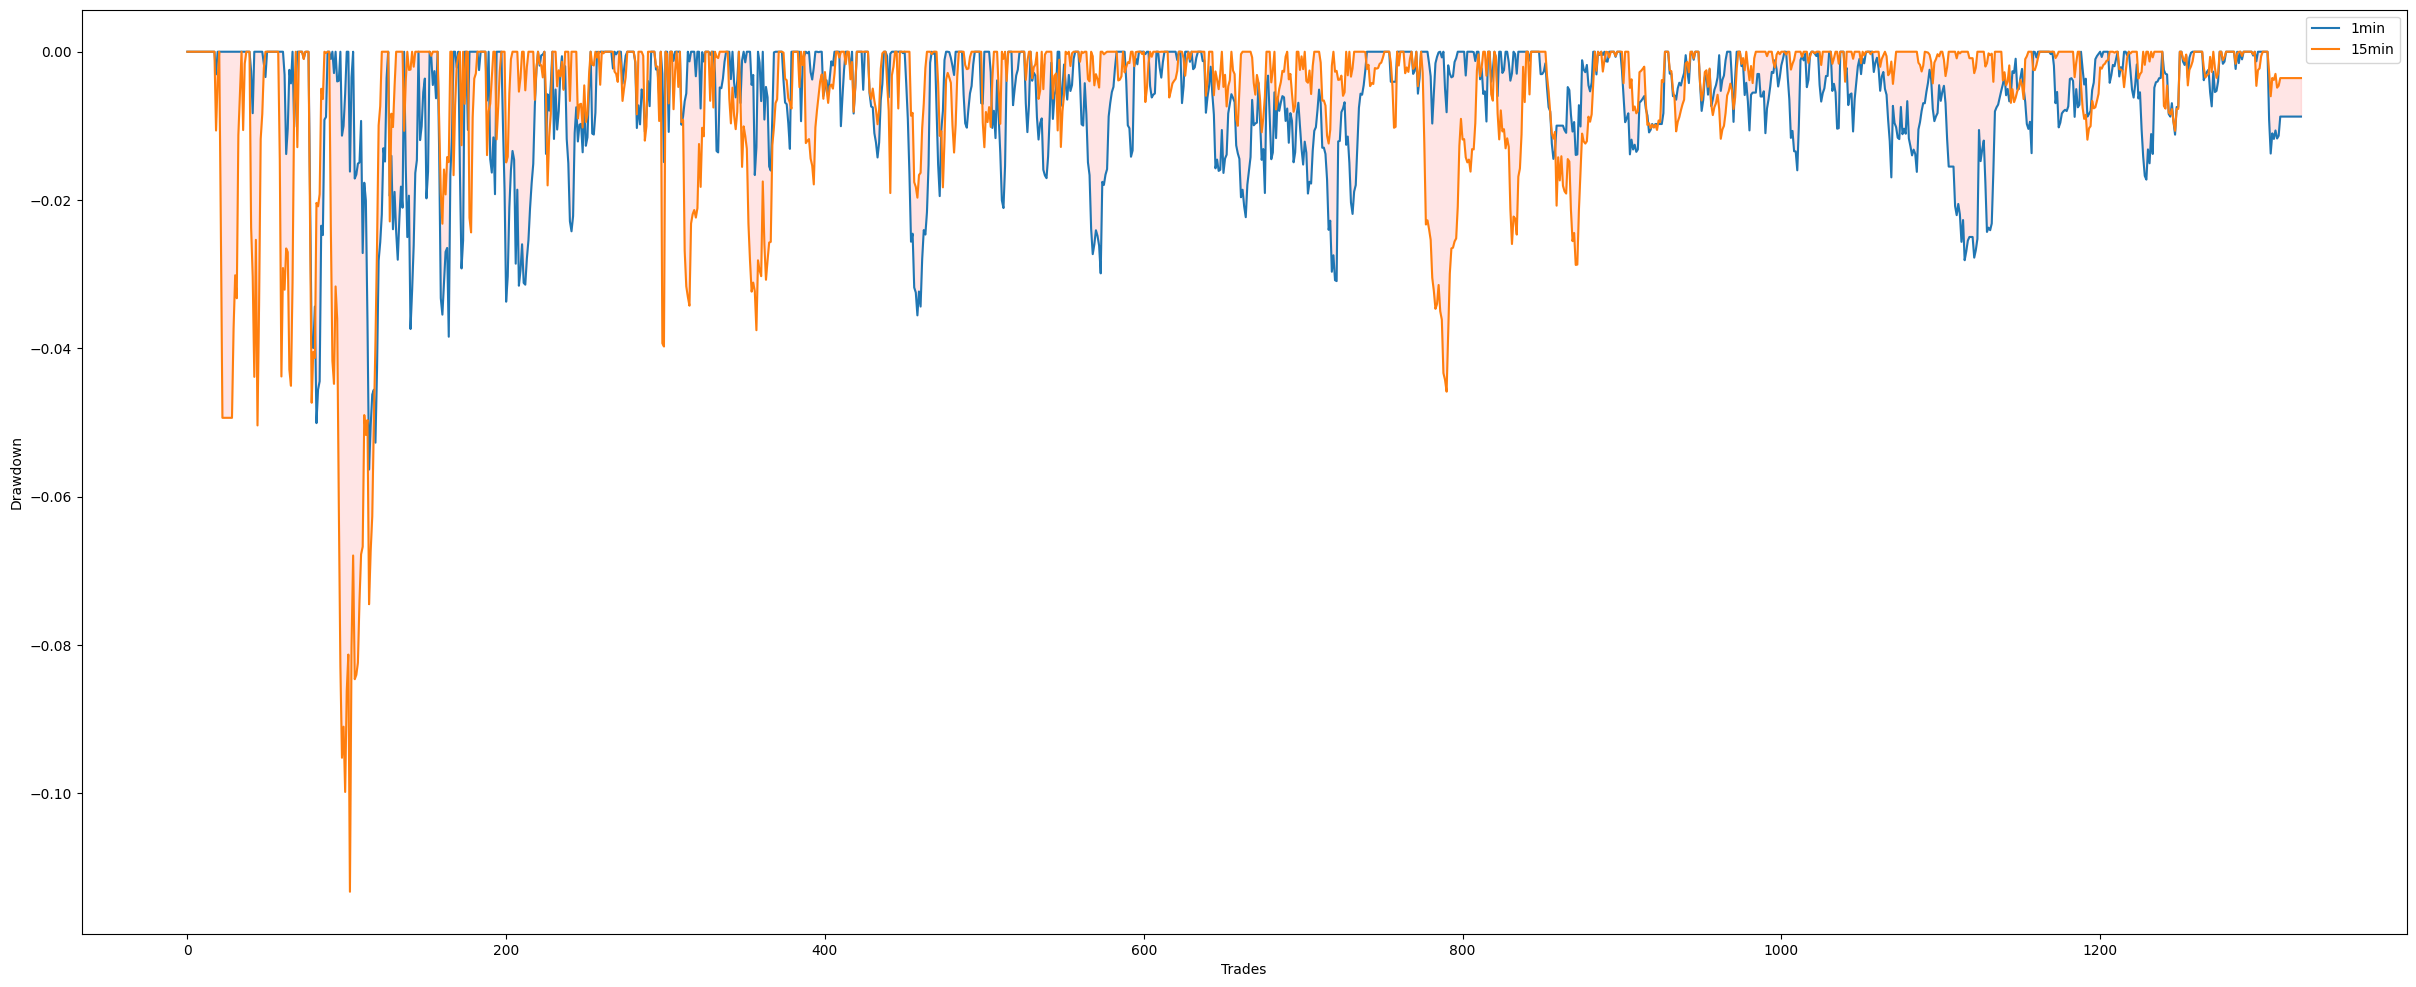

In [165]:
#plot underwater drawdown chart for both min1plot and min15plot
#make sure to make it big enough to see the difference 


plt.figure(figsize=(30,12))
plt.plot(min1plot['balance'].div(min1plot['balance'].cummax()).sub(1), label='1min')
plt.plot(min15plot['balance'].div(min15plot['balance'].cummax()).sub(1), label='15min')
#add fill color between the two lines
plt.fill_between(min1plot.index, min1plot['balance'].div(min1plot['balance'].cummax()).sub(1), min15plot['balance'].div(min15plot['balance'].cummax()).sub(1), color='red', alpha=0.1)
plt.xlabel('Trades')
plt.ylabel('Drawdown')
plt.legend()
plt.show()
